# How Accurately Can We Predict the Score of the 2020 Super Bowl?

## Overview

Using the data found in game-by-game National Football League (NFL) statistics spanning from 1967 to present-day, we sought to consolidate and identify key variables and patterns in order to predict the final score of this year’s championship game, also known as the Super Bowl. Our approach to answering this question required us to use and analyze game and betting information from dozens of past football seasons, which we used to create exploratory data visualizations and a multivariate linear regression model. In an attempt to truly assess the accuracy and validity of our prediction, we trained the model on a range of distinct subsets of our dataset to determine which would be the most accurate way to predict the final score of the Super Bowl.

## Team

 - Anthony Limon
 - Daniel Patton
 - Iman Nematollahi
 - Soon Gi Shin

## Research Question

Are there any notable variables or historical metrics that, using a data-driven approach, can help infer whether the San Francisco 49ers or the Kansas City Chiefs will win the Super Bowl? 

How will a multivariate logistic regression model, trained on different sets of data, help to determine the most accurate way to predict the final score of the Super Bowl?


## Background and Prior Work

#### Background:
With the Super Bowl being one of the largest sporting events in the United States, hundreds of millions of people across America tune in annually to watch the big game. In the past, the Super Bowl has been the most-watched American television broadcast of the year several times, making its viewership highly attractive to companies that hope that commercial airtime will generate widespread exposure and awareness of their product/service. Its high viewership is also what makes it the most gambled-on sporting event in the United States. As such, having access to a tool that could predict the final score with reasonable accuracy has a lot of worth in the sports-betting scene, and there are currently many different people and organizations trying to predict sport scores through the utilization of predictive models.
#### Prior Work:
We found several projects that shared a similar goal to ours, which was predicting the winner of a sports tournament. Though there were a multitude of projects that used a variety of different methods and techniques in order to predict the results of a sports game, there were a few projects that we found to be closely aligned with our intended vision. Two examples of such projects were "Super Bowl Prediction Model" by Matthew Littman, and "Predicting the Super Bowl" by Michael Walker. 

The first project (Littman) used analysis data, such as winning percentage throughout the regular football season, offensive stats, defensive stats, and turnovers in-game, to determine which team would win the Super Bowl and what the final score would be. After implementing several data models, and most notably, linear regression tools, Littman’s project concluded that the 49ers had a 96% chance of winning while the Patriots had a 76% chance of winning. 
The second project (Walker) went a step further, giving more weight to "other" variables, such as weather, injuries, and turnover ratio, in the prediction model in addition to the other base stats (offense, defense, win percentage), to make its assessment about which team would emerge victorious. This model, on average, predicted a Hawks victory 62% of the time.

Because these two projects aim to answer the same exact question that we seek to solve in this project, both of these prior works can be hugely informative in helping us create our own Super Bowl prediction model. 
References (include links):

- https://www.datasciencecentral.com/profiles/blogs/predicting-the-super-bowl
- https://towardsdatascience.com/updated-super-bowl-prediction-model-2019-90d2a039b2ba

(Relevant):

- https://projects.fivethirtyeight.com/2019-nfl-predictions/
- https://data.world/callmeklep/superbowl/workspace/project-summary?agentid=sports&datasetid=history-of-the-super-bowl
- https://www.newhaven.edu/news/blog/2019/super-bowl.php


## Hypothesis

The datasets and the model that we work with will be sufficient in making a prediction about who wins the Super Bowl. Our hypothesis is that the Kansas City Chiefs will beat the San Francisco 49ers by a margin of 10 points. Although the San Francisco 49ers have the better defense, the Kansas City Chiefs have the better offense, and an overall better team. 

## Dataset

#### Dataset 1: NFL scores and betting data
 - Link to overall dataset: https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data

*Data Source used: spreadspoke_scores.csv*
    
 - Link: https://www.kaggle.com/tobycrabtree/nfl-scores-and-betting-data#spreadspoke_scores.csv
 - 12678 observations.
 - This data set contains information on every game played in each NFL season since 1966. Each row in this dataset represents an individual game, with each cell containing the respective information for that game. Such information includes the score, stadium, teams playing, stadium weather conditions, team favorite, over/under spread and more.
The majority of the project uses the spreadspoke_scores dataset due to the massive amount of information it provides. This data set is combined with elements from the nfl_stadiums in order to make up for missing values.


## Setup

In [521]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [522]:
#We will be using this datatset we found which has score, betting, and weather statistics for every NFL game played ever.
games = pd.read_csv('spreadspoke_scores.csv')

In [523]:
games

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,09/02/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,09/03/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,09/04/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,09/09/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,09/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12673,01/12/2020,2019,Division,True,Green Bay Packers,28,23,Seattle Seahawks,GB,-4.5,45.5,Lambeau Field,False,NaN,NaN,NaN,NaN
12674,01/12/2020,2019,Division,True,Kansas City Chiefs,51,31,Houston Texans,KC,-10.0,50.5,Arrowhead Stadium,False,NaN,NaN,NaN,NaN
12675,01/19/2020,2019,Conference,True,Kansas City Chiefs,35,24,Tennessee Titans,KC,-7.0,51,Arrowhead Stadium,False,NaN,NaN,NaN,NaN
12676,01/19/2020,2019,Conference,True,San Francisco 49ers,37,20,Green Bay Packers,SF,-8.0,46.5,Levi's Stadium,False,NaN,NaN,NaN,NaN


## Data Cleaning

### Imputing Missing Values

#### Weather

Upon looking through the dataset for the first time, we noticed that many of the rows were missing values for the columns related to weather. We did not want to simply drop these rows, as we wanted to keep as much data as we could, and removing all of them would have essentially resulted in us cutting the size of our dataset in half.

So, instead, we decided to find the medians of the weather statistics for each stadium, and to impute the missing values for each row with these values based on the stadium the game was played at.

###### weather_temperature

In [524]:
#imputed missing weather_temperatures with median temperature for that stadium
games['weather_temperature'] = games.groupby('stadium')['weather_temperature'].transform(lambda x: x.fillna(x.median()))

Some of the values remained missing in this column because, for a few of the stadiums, every record for that stadium contained a null value for the column, so we re-imputed these missing values with the overall median weather_temperature for the entire dataset.

In [525]:
games['weather_temperature'] = games['weather_temperature'].fillna(games['weather_temperature'].median())

##### weather_wind_mph

In [526]:
#imputed missing weather_wind_mph with median temperature for that stadium
games['weather_wind_mph'] = games.groupby('stadium')['weather_wind_mph'].transform(lambda x: x.fillna(x.median()))

In [527]:
#re-impute values that are still missing to the overall median of the column
games['weather_wind_mph'] = games['weather_wind_mph'].fillna(games['weather_wind_mph'].median())

##### weather_humidity 

The humidty values were originally represented as strings and some of the values even included a '%' at the end. So we first had to strip all non-numeric values and then we converted the column to the float type.

In [528]:
games['weather_humidity'] = (games['weather_humidity'].str.strip('%')).astype(float)

Now that all of the values in the weather_humidity column were cleaned and of the same type, we could now impute the missing values for this column.

In [529]:
games['weather_humidity'] = games.groupby('stadium')['weather_humidity'].transform(lambda x: x.fillna(x.median()))

Again, because there still remained missing values in this column after having imputed the null values using each stadium's median, we decided to instead impute using the median of the weather_humidity column for the entire dataset.

In [530]:
#re-impute values that are still missing to the overall median of the column
games['weather_humidity'] = games['weather_humidity'].fillna(games['weather_humidity'].median())

##### weather_detail

Because weather_detail contained text values which reported the weather conditions (precipitation) for that day, and missingness in this column was actually an indicator of clear weather, we decided to replace the missing values in this column with the word 'none' to get rid of the null values.

In [531]:
games['weather_detail'] = games['weather_detail'].fillna('none')

### Type Casting

##### over_under_line

When looking through the dataset, we also noticed that the over_under_line column was of the type string and that some of the values in that column were just an empty space (' '). Because we believe that betting odds are an important predictor of the final score of a game, and there is no real, meaningful way of imputing these values, we decided to simply drop the rows that did not contain a value for the over_under_line column.

In [532]:
games = games.drop(games[games['over_under_line'] == ' '].index)

Now that the column contains only numeric values, we convert it from string to float.

In [533]:
games['over_under_line'] = games['over_under_line'].astype(float)

#### Converting Team Names into Integers

In order to keep track of only the important teams and get rid of some of the categorical columns, we converted all of the strings that referenced teams to integers. We assigned 0 to Kansas City, 1 to San Francisco, and 2 to all other teams.

##### team_home

In [534]:
#convert team_home column to integers
games.loc[(games['team_home'] != 'Kansas City Chiefs') & (games['team_home'] != 'San Francisco 49ers'), 'team_home'] = ([2] * 11741)
games['team_home'] = games['team_home'].replace({'Kansas City Chiefs':0,'San Francisco 49ers':1})

##### team_away

In [535]:
#convert team_away column to integers
games.loc[(games['team_away'] != 'Kansas City Chiefs') & (games['team_away'] != 'San Francisco 49ers'), 'team_away'] = ([2] * 11757)
games['team_away'] = games['team_away'].replace({'Kansas City Chiefs':0,'San Francisco 49ers':1})

##### team_favorite_id

In [536]:
#convert team_favorite_id column to integers
games.loc[(games['team_favorite_id'] != 'KC') & (games['team_favorite_id'] != 'SF'), 'team_favorite_id'] = ([2] * 11866)
games['team_favorite_id'] = games['team_favorite_id'].replace({'KC':0,'SF':1})

### Drop useless rows

For a majority of the games in the first 12 years of the NFL, information for betting odds were not kept (spread, team favored, over under line). Seeing as how we believe these statistics to be important for our prediction and how there is no way of imputing these values meaningfully, we decided to drop these rows that had missing values for columns related to betting information. Since we had basically imputed all of the missing values for all of the other columns unrelated to betting, the only columns remaining that could potentially contain missing values were these betting information columns. Thus, we were able to simply drop all rows that had any missing values from the table.

In [537]:
games = games.dropna().reset_index(drop=True)
games

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,01/14/1968,1967,Superbowl,True,2,33,14,2,2,-13.5,43.0,Orange Bowl,True,60.0,12.0,74.0,none
1,01/12/1969,1968,Superbowl,True,2,7,16,2,2,-18.0,40.0,Orange Bowl,True,66.0,12.0,80.0,none
2,01/11/1970,1969,Superbowl,True,0,23,7,2,2,-12.0,39.0,Tulane Stadium,True,55.0,14.0,84.0,none
3,01/17/1971,1970,Superbowl,True,2,16,13,2,2,-2.5,36.0,Orange Bowl,True,59.0,11.0,60.0,none
4,01/16/1972,1971,Superbowl,True,2,24,3,2,2,-6.0,34.0,Tulane Stadium,True,34.0,18.0,40.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,01/12/2020,2019,Division,True,2,28,23,2,2,-4.5,45.5,Lambeau Field,False,45.0,10.0,74.0,none
10123,01/12/2020,2019,Division,True,0,51,31,2,0,-10.0,50.5,Arrowhead Stadium,False,53.0,11.0,68.0,none
10124,01/19/2020,2019,Conference,True,0,35,24,2,0,-7.0,51.0,Arrowhead Stadium,False,53.0,11.0,68.0,none
10125,01/19/2020,2019,Conference,True,1,37,20,2,1,-8.0,46.5,Levi's Stadium,False,65.0,5.0,69.0,none


### 2019 SuperBowl

We want to save the information about the 2019 Super Bowl in order to use it to test our model, but we have to remove it from the table because our model should not already have any existing prior knowledge about the actual results of the 2019 Super Bowl.

In [538]:
the_superbowl = games.iloc[[10126]]
games = games.drop(10126)
the_superbowl

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
10126,02/02/2020,2019,Superbowl,True,0,31,20,1,0,-1.5,53.0,Hard Rock Stadium,True,84.0,8.0,69.0,none


### Splitting Datasets

We created a few subsets from our completed dataset that looked at specific times and events in order to see how relevant certain sets of games were for our prediction model.

#### niners_and_chiefs

We called the first subset that we created 'niners_and_chiefs' because it contained all of the games played by either the Kansas City Chiefs or the San Francisco 49ers in the 2019 season.

In [539]:
#get all games from the 2019 season
recent_games = games[(games['schedule_season']>=2019)]
#get only games where chiefs or niners played
niners_and_chiefs = (recent_games[((recent_games['team_home']==0) | (recent_games['team_away']==0))
     | ((recent_games['team_home']==1) | (recent_games['team_away']==1))]).reset_index(drop=True)
niners_and_chiefs

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,09/08/2019,2019,1,False,2,26,40,0,0,-3.5,49.0,TIAA Bank Field,False,75.5,11.0,69.0,none
1,09/08/2019,2019,1,False,2,17,31,1,2,-1.0,51.0,Raymond James Stadium,False,76.0,7.0,72.0,none
2,09/15/2019,2019,2,False,2,17,41,1,2,-1.0,46.0,Paul Brown Stadium,False,51.0,7.0,68.0,none
3,09/15/2019,2019,2,False,2,10,28,0,0,-7.0,53.0,Oakland Coliseum,False,58.0,8.0,76.0,none
4,09/22/2019,2019,3,False,0,33,28,2,0,-5.0,52.0,Arrowhead Stadium,False,53.0,11.0,68.0,none
5,09/22/2019,2019,3,False,1,24,20,2,1,-6.0,44.5,Levi's Stadium,False,65.0,5.0,69.0,none
6,09/29/2019,2019,4,False,2,30,34,0,0,-7.0,54.5,Ford Field,False,72.0,0.0,69.0,DOME
7,10/06/2019,2019,5,False,0,13,19,2,0,-10.5,55.5,Arrowhead Stadium,False,53.0,11.0,68.0,none
8,10/07/2019,2019,5,False,1,31,3,2,1,-4.5,48.0,Levi's Stadium,False,65.0,5.0,69.0,none
9,10/13/2019,2019,6,False,0,24,31,2,0,-3.5,54.5,Arrowhead Stadium,False,53.0,11.0,68.0,none


#### superbowls

Then, we took another subset from our completed dataset, and called it 'superbowls' as it held information on every Super Bowl game ever played.

In [540]:
superbowls = (games[games['schedule_week']=='Superbowl']).reset_index(drop=True)
superbowls

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,01/14/1968,1967,Superbowl,True,2,33,14,2,2,-13.5,43.0,Orange Bowl,True,60.0,12.0,74.0,none
1,01/12/1969,1968,Superbowl,True,2,7,16,2,2,-18.0,40.0,Orange Bowl,True,66.0,12.0,80.0,none
2,01/11/1970,1969,Superbowl,True,0,23,7,2,2,-12.0,39.0,Tulane Stadium,True,55.0,14.0,84.0,none
3,01/17/1971,1970,Superbowl,True,2,16,13,2,2,-2.5,36.0,Orange Bowl,True,59.0,11.0,60.0,none
4,01/16/1972,1971,Superbowl,True,2,24,3,2,2,-6.0,34.0,Tulane Stadium,True,34.0,18.0,40.0,none
5,01/14/1973,1972,Superbowl,True,2,14,7,2,2,-1.0,33.0,Los Angeles Memorial Coliseum,True,64.0,7.0,53.0,none
6,01/13/1974,1973,Superbowl,True,2,24,7,2,2,-6.5,33.0,Rice Stadium,True,47.0,7.0,81.0,none
7,01/12/1975,1974,Superbowl,True,2,6,16,2,2,-3.0,33.0,Tulane Stadium,True,51.0,17.0,72.0,none
8,01/18/1976,1975,Superbowl,True,2,17,21,2,2,-7.0,36.0,Orange Bowl,True,49.0,18.0,44.0,none
9,01/09/1977,1976,Superbowl,True,2,14,32,2,2,-4.0,38.0,Rose Bowl,True,52.0,6.0,59.0,none


#### current_and_superbowls

And lastly, we took all of the information contained in the previous two subsets that we created, niners_and_chiefs and superbowls, and put them together to form the subset 'current_and_superbowls', which contains information for all of the games played by the Kansas City Chiefs and San Francisco 49ers in the 2019 NFL season and for all of the past Super Bowl games.

In [541]:
current_and_superbowls = pd.concat([niners_and_chiefs,superbowls])
current_and_superbowls

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,09/08/2019,2019,1,False,2,26,40,0,0,-3.5,49.0,TIAA Bank Field,False,75.5,11.0,69.0,none
1,09/08/2019,2019,1,False,2,17,31,1,2,-1.0,51.0,Raymond James Stadium,False,76.0,7.0,72.0,none
2,09/15/2019,2019,2,False,2,17,41,1,2,-1.0,46.0,Paul Brown Stadium,False,51.0,7.0,68.0,none
3,09/15/2019,2019,2,False,2,10,28,0,0,-7.0,53.0,Oakland Coliseum,False,58.0,8.0,76.0,none
4,09/22/2019,2019,3,False,0,33,28,2,0,-5.0,52.0,Arrowhead Stadium,False,53.0,11.0,68.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,02/02/2014,2013,Superbowl,True,2,8,43,2,2,-2.0,47.5,MetLife Stadium,True,56.5,6.0,55.0,none
47,02/01/2015,2014,Superbowl,True,2,28,24,2,2,-1.0,47.5,University of Phoenix Stadium,True,72.0,0.0,34.0,DOME
48,02/07/2016,2015,Superbowl,True,2,24,10,2,2,-4.5,43.0,Levi's Stadium,True,76.0,16.0,69.0,none
49,02/04/2018,2017,Superbowl,True,2,33,41,2,2,-4.5,48.5,U.S. Bank Stadium,True,72.0,0.0,69.0,DOME


## Data Analysis

#### Score Distributions

The following cell contains functions that can be applied to all of the rows of a dataset to get a list of every score earned by the San Francisco 49ers or the Kansas City Chiefs.

In [542]:
def get_niners(df):
    niners = 0
    if (df['team_home'] == 1):
        niners += df['score_home']
    if(df['team_away'] == 1):
        niners += df['score_away']
    copy = df.copy()
    copy['niners'] = niners
    return copy

def get_chiefs(df):
    chiefs = 0
    if (df['team_home'] == 0):
        chiefs += df['score_home']
    if(df['team_away'] == 0):
        chiefs += df['score_away']
    copy = df.copy()
    copy['chiefs'] = chiefs
    return copy

First, in order to get a better measure of how the 49ers and the Chiefs were performing in this past year's season, we plotted a histogram of all of the scores from games played by both teams. In the chart below, we can see that the 49ers' scores have a rather normal distribution, the mean of which being around 30 points.

Text(0.5, 1.0, '49ers Points Scored in 2019')

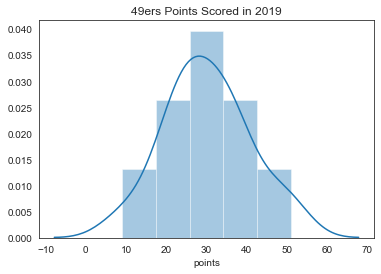

In [543]:
nscores2019 = niners_and_chiefs[(niners_and_chiefs['team_home'] == 1) | (niners_and_chiefs['team_away'] == 1)].apply(get_niners, axis=1)['niners'].values
sns.distplot(nscores2019)
plt.xlabel('points')
plt.title('49ers Points Scored in 2019')

The Kansas City Chiefs, on the other hand, have a score distribution that is less normal than the 49ers and is skewed more to the right, meaning that their mean score is likely higher, as both are basically centered around the same value.

Text(0.5, 1.0, 'Chiefs Points Scored in 2019')

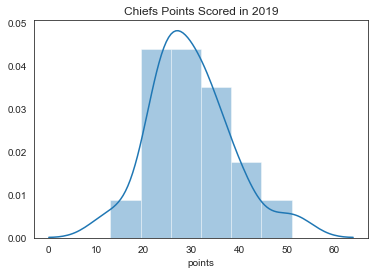

In [544]:
cscores2019 = niners_and_chiefs[(niners_and_chiefs['team_home'] == 0) | (niners_and_chiefs['team_away'] == 0)].apply(get_chiefs, axis=1)['chiefs'].values
sns.distplot(cscores2019)
plt.xlabel('points')
plt.title('Chiefs Points Scored in 2019')

Next, we took a look at the score distributions for all of the games played by both the San Francisco 49ers and the Kansas City Chiefs since the year they hired their current head coaches, as we wanted to see just how well the teams have played and continue to play under the two coaches' instructions.

Text(0.5, 1.0, '49ers Points Scored With Kyle Shanahan')

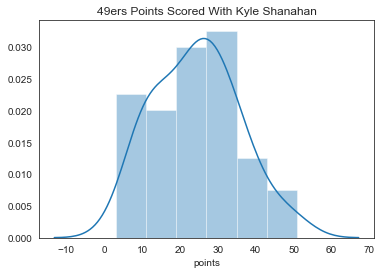

In [545]:
ncoach = games[games['schedule_season'] >= 2017]
nscores_all = ncoach[(ncoach['team_home'] == 1) | (ncoach['team_away'] == 1)].apply(get_niners, axis=1)['niners'].values
sns.distplot(nscores_all)
plt.xlabel('points')
plt.title('49ers Points Scored With Kyle Shanahan')

Text(0.5, 1.0, 'Chiefs Points Scored With Andy Reid')

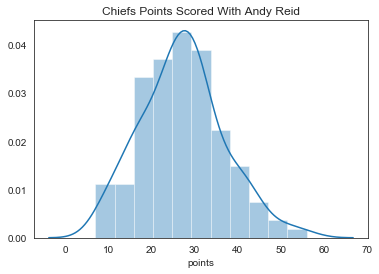

In [546]:
ccoach = games[games['schedule_season'] >= 2013]
cscores_all = ccoach[(ccoach['team_home'] == 0) | (ccoach['team_away'] == 0)].apply(get_chiefs, axis=1)['chiefs'].values
sns.distplot(cscores_all)
plt.xlabel('points')
plt.title('Chiefs Points Scored With Andy Reid')

Both teams seem to have maintained the same levels of performance since the introduction of their head coaches, which shows that it is likely that they will both continue to play consistently and at the high skill levels that they generally have, even on a stage and with an audience as big as the Super Bowl's.

#### Super Bowl Score Distributions

Next, we plotted the distribution of the scores for the winning and losing teams for every Super Bowl since the beginning of the NFL to see what the typical scores were and what kinds of trends they followed.

To help us, we created a function that would give us the winning and losing teams' scores for each Super Bowl.

In [547]:
#function to get winning and losing team score
def win_lose(inputdf):
    winner, loser = 0, 0
    if (inputdf['score_home'] > inputdf['score_away']):
        winner += inputdf['score_home']
        loser += inputdf['score_away']
    else:
        winner += inputdf['score_away']
        loser += inputdf['score_home']
    temp = inputdf.copy()
    temp['win'] = winner
    temp['lose'] = loser
    return temp
    
win_and_loss = games.apply(win_lose, axis=1)

Below, we can see that the winning and losing teams' scores generally follow a normal distribution, where the winning team's average score is around 27 and the losing team's average score is around 14. This tells us that the final Super Bowl scores fall between these values on average and that there is usually a 13 point difference between the two teams. Notice how the lines for the distribution are very 'hilly' or curvy rather than smooth and straight. We believe that this is because of how the scoring system for football is set up as points are typically incremented by counts of 3 or 7, which will cause certain scores to be much more common than others.

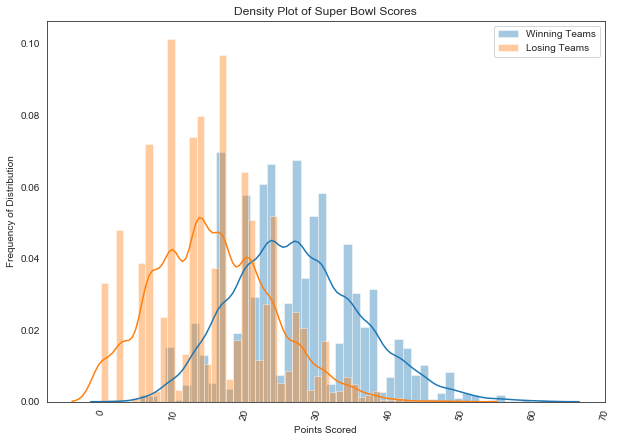

In [548]:
plt.figure(figsize=(10,7))
plt.xticks( rotation=75)
sns.set_style("white")

sns.distplot(a=win_and_loss['win'], label="Winning Teams")
sns.distplot(a=win_and_loss['lose'], label="Losing Teams")
plt.xlabel('Points Scored')
plt.ylabel('Frequency of Distribution')

plt.title("Density Plot of Super Bowl Scores")

#shows legend
plt.legend()

#### Wind Speed vs. Away Team Score

We noticed that there existed a slight negative correlation between wind speeds and the away teams' scores. In general, this observation makes logical sense as the away teams may not be used to playing in their opponent's stadiums, where there may be more turbulent wind conditions. As such, these stadiums that experience higher wind speeds could cause it to be harder for the away teams to score, especially if those teams are not accustomed to such conditions in their respective home stadiums. 

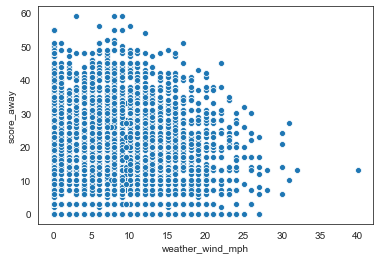

In [549]:
#higher wind speeds has a slight correlation with lower score for away team
sns.scatterplot(games['weather_wind_mph'],games['score_away'])

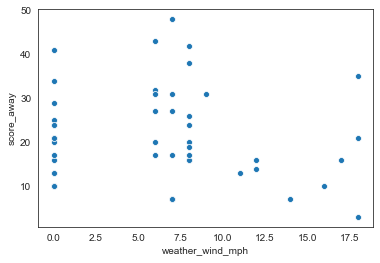

In [550]:
#higher wind speeds has a slight correlation with lower score for away team
sns.scatterplot(superbowls['weather_wind_mph'],superbowls['score_away'])

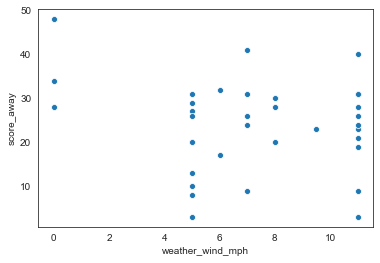

In [551]:
#higher wind speeds has a slight correlation with lower score for away team
sns.scatterplot(niners_and_chiefs['weather_wind_mph'],niners_and_chiefs['score_away'])

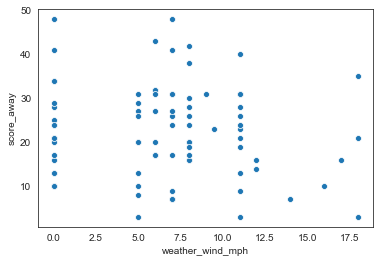

In [552]:
#higher wind speeds has a slight correlation with lower score for away team
sns.scatterplot(current_and_superbowls['weather_wind_mph'],current_and_superbowls['score_away'])

#### Over-Under Bets Over Time

In the chart below, we also illustrate the slightly positive correlation between the schedule_season and over_under_line attributes. As such, we can see that as the years have progressed, the over-under-line values have tended to slightly increase as well. This demonstrates how teams are being projected to score more in games overall; thus leading to higher scoring games.

Text(0.5, 1.0, 'Over Under Bets Over The Years')

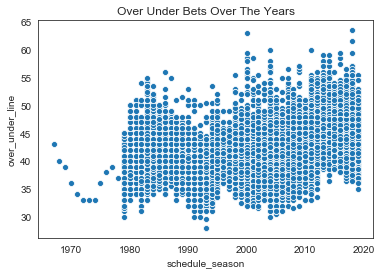

In [553]:
sns.scatterplot(games['schedule_season'],games['over_under_line'])
plt.title('Over Under Bets Over The Years')

#### Team Performance vs Betting Odds

We wanted to take a look at how teams performed (their scores), depending on how they were favored in the betting odds.

Because the Kansas City Chiefs were favored to win the 2019 Super Bowl with a -1 spread according to the Vegas odds, we wanted to analyze how the Chiefs performed in the 2019 NFL season when they were favored to win. In addition, we also wanted to look at how the San Francisco 49ers performed when they were not favored to win.

Here, we made a function to help us get all of the scores for both the Chiefs and their opponents when the Chiefs were favored to win.

In [554]:
def get_scores(df,id_num):
    fav = (df[df['team_favorite_id']==id_num])
    hs = list((fav[fav['team_home']==id_num])['score_home'].values)
    opp_aws = list((fav[fav['team_home']==id_num])['score_away'].values)
    aws = list((fav[fav['team_away']==id_num])['score_away'].values)
    opp_hs = list((fav[fav['team_away']==id_num])['score_home'].values)

    return hs+aws,opp_aws+opp_hs

We can see from the graph that the Chiefs were favored to win almost every game that they played this season (15 out of 18 games).

The chart below shows that in these games, the Chiefs tended to win a majority of the time, losing just 3 out of the 15 games that they were favored, 2 of which being from the beginning of the season. We can see that as the weeks progressed, the Chiefs became more consistent in their wins. Also, according to the chart, one can see that when the Chiefs did, in fact, lose, they only lost by a few mere points.

<Figure size 1440x2160 with 0 Axes>

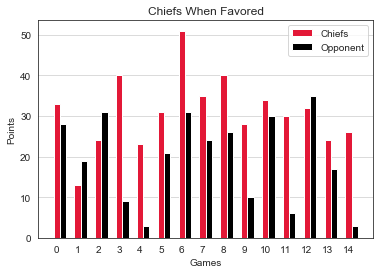

<Figure size 1440x2160 with 0 Axes>

In [555]:
kc,opp = get_scores(niners_and_chiefs,0)
width = .3
plt.bar(np.arange(len(kc)),kc,width,color='#E31837',label = 'Chiefs')
plt.bar(np.arange(len(kc))+width,opp,width,color='black',label = 'Opponent')
plt.xticks(np.arange(len(kc)))
plt.xlabel('Games')
plt.ylabel('Points')
plt.legend(loc='upper right')
plt.title('Chiefs When Favored')
plt.grid(b=True, which='major', color='#D3D3D3', linestyle='-',axis='y')
plt.figure(figsize=(20,30))

Here, we made a second function to help us get all of the scores for both the 49ers and their opponents when the 49ers were not favored to win.

In [556]:
#niners were not favored to win 5 times, all when they were away
def get_scores_sf(df):
    fav = df[(df['team_favorite_id']==2) & (df['team_away']==1)]
    hs = list(fav['score_home'].values)
    opps = list(fav['score_away'].values)

    return hs,opps

We can see that the 49ers were not favored win only 5 times, and that they, for the most part, have demonstrated that they are capable of proving the odds wrong by winning 4 out of the 5 games.

<Figure size 1440x2160 with 0 Axes>

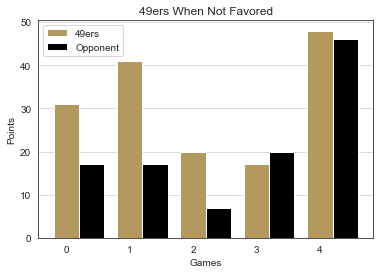

<Figure size 1440x2160 with 0 Axes>

In [557]:
opp,sf = get_scores_sf(niners_and_chiefs)
width = .4
plt.bar(np.arange(len(sf)),sf,width,color='#B3995D',label = '49ers')
plt.bar(np.arange(len(sf))+width,opp,width,color='black',label = 'Opponent')
plt.xlabel('Games')
plt.ylabel('Points')
plt.legend(loc='best')
plt.title('49ers When Not Favored')
plt.grid(b=True, which='major', color='#D3D3D3', linestyle='-',axis='y')
plt.figure(figsize=(20,30))

Having taken a look at both of the charts above, which plot the scores of the Chiefs and the 49ers when they are favored and not favored, respectively, we can see why the Vegas odds for the Chiefs is only -1. Because both teams tend to perform well under these specified circumstances (conditions which are mirrored by this year's Super Bowl), it is difficult for anyone to predict which team will come out on top in the championship game.

#### Correlation Heatmap

Lastly, we created a heatmap of all of the columns in our dataset to see which pairs of columns were correlated, and how heavily they influenced each other. This would give us some insight into which attributes would most significantly impact the results of our predictive model, and also which attribute we could potentially drop.

(0, 15)

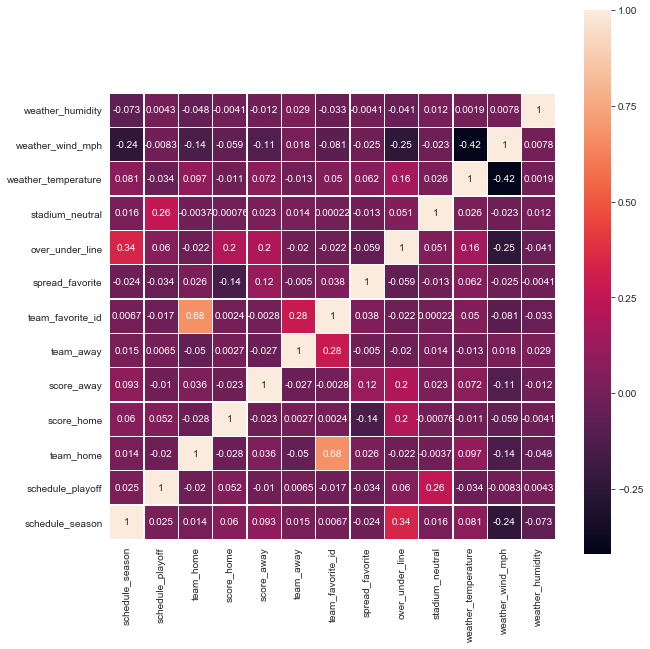

In [558]:
games_corr = games.corr()
plt.subplots(figsize=(10, 10))
ax = sns.heatmap(games_corr, square=True, annot=True, linewidths=.5, xticklabels=True, yticklabels=True)
ax.set_ylim([0, 15])

## Prediction Model

For our model, we planned to use most of the attributes that were originally included in our dataset, but we figured that there were some that were unnecessary and could therefore be dropped. Upon doing some general analysis, we found that many of the categorical columns, such as 'schedule_date', 'stadium', 'schedule_week', and 'weather_detail' would not contribute any meaningful data to our prediction model, so we made the decision to leave them out of our list of predictors. Using the remaining attributes, we fitted the model and set it to predict the values for the 'score_home' and 'score_away' columns for this year's Super Bowl game.

Our decision to use multiple linear regression as our model was our attempt to try to model the relationship between what we believed to be influential factors in our prediction and the final score of the Super Bowl. Having seen some linearity in the relationships between such data, we determined that such a model could potentially be apt at providing some level of understanding to the question we sought to answer.

When creating the model, we were initially unsure as to which of our datasets would prove to be best for fitting our model. Originally, we wanted to use the 'games' DataFrame, which has information on every NFL game ever played; however, we then discussed the possibility that using that particular dataset might lead to inaccurate results, since NFL teams' performances can drastically change each year, especially after changes to players and coaches are made. We then thought to just use our niners_and_chiefs DataFrame which only had information on all of the Chiefs and 49ers games played in 2019. But we also had some minor doubts about using this dataset, mainly regarding its size as it contained only around 30 rows in total. One final idea that we had was to supplement the information found in the niners_and_chiefs DataFrame with data from the superbowls DataFrame, which we named 'current_and_superbowl'. This dataset had not only all of the games played by the Chiefs and 49ers in the 2019 NFL season but also all of the Super Bowl games that have ever been played. Though this dataset still did not have as many rows as something like the games DataFrame, we believed that it might be able to produce a result that was more appropriate than the others. Because of the issues we had with each set of data, we decided to train our prediction model using all three datasets and to put them to the test, comparing their predictive power using RMSE, to find out which among them is the best.

The cell below gets rid of all of the unnecessary predictors mentioned above for our stored row containing information about the 2019 Super Bowl. We will be inputting this data into our model to see what kind of predictions are made about the final scores for both teams in the championship game.

In [559]:
the_superbowl = the_superbowl.drop(['schedule_date','schedule_week','stadium','weather_detail','score_home','score_away'],1)
the_superbowl

,schedule_season,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity
10126,2019,True,0,1,0,-1.5,53.0,True,84.0,8.0,69.0


#### Model Fit 1 - niners_and_chiefs

First, we will fit our model on the niners_and_chiefs dataset, which has all of the information on games played by the Chiefs and the 49ers in the 2019 NFL season, and test the overall predictive power associated with using data from regular season games. We will begin by splitting the dataset into training and test sets.

In [560]:
X = niners_and_chiefs.drop(['schedule_date','score_home','score_away','stadium','schedule_week','weather_detail'], 1).dropna().drop_duplicates()
y = niners_and_chiefs[['score_home', 'score_away']].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = (model.predict(X_test).astype(int))
actual = (y_test)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
pd.DataFrame({'actual_home_score':actual[:,0],'predicted_home_score':predictions[:,0],
             'actual_away_score':actual[:,1],'predicted_away_score':predictions[:,1]})

Root Mean Squared Error: 11.020183503211026


,actual_home_score,predicted_home_score,actual_away_score,predicted_away_score
0,35,44,24,26
1,31,32,3,26
2,0,12,9,10
3,27,50,10,26
4,25,23,28,25
5,30,38,34,51
6,35,21,32,34
7,13,18,19,23
8,17,20,31,36


Judging by the result we got for the RMSE of our predicted scores, fitting our model on the chiefs_and_niners dataset does not seem to be very accurate for making such predictions.

Here, we fit the model on the entire niners_and_chiefs dataset and see the scores that it predicts for this year's Super Bowl.

In [561]:
model.fit(X,y)
print('Super Bowl Prediction: '+str(model.predict(the_superbowl).astype(int)))

Super Bowl Prediction: [[70 35]]


The model successfully predicts that the Chiefs will win, but the score is not very accurate, as it very over-estimates the score values for both teams.

Below, we are able to see in the table which attributes most significantly influence the prediction of our model.

In [562]:
pd.DataFrame(model.coef_.T, X.columns, columns=['home_score_correlation', 'away_score_correlation'])

,home_score_correlation,away_score_correlation
schedule_season,0.000000,0.000000
schedule_playoff,9.467822,1.635903
team_home,-20.833818,-7.168984
team_away,-9.412227,-10.043397
team_favorite_id,-2.634069,2.797818
spread_favorite,1.500650,0.639081
over_under_line,-1.007647,0.623286
stadium_neutral,-1.261409,-10.213330
weather_temperature,0.328891,0.196308
weather_wind_mph,-2.687207,-0.695444


#### Model Fit 2 - games

Next, we will fit our model on the games dataset, which contains all of the information on every single game ever played in NFL history, and see how it compares to the first dataset. We will begin by splitting the dataset into training and test sets to measure the overall predictive power associated with using data related to the entire game history of the NFL.

In [563]:
X = games.drop(['schedule_date','score_home','score_away','stadium','schedule_week','weather_detail'], 1)
y = games[['score_home', 'score_away']].values
X_train, X_test, y_train, y_test = train_test_split(X, y)


model.fit(X_train, y_train)
predictions = (model.predict(X_test).astype(int))
actual = (y_test)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
pd.DataFrame({'actual_home_score':actual[:,0],'predicted_home_score':predictions[:,0],
             'actual_away_score':actual[:,1],'predicted_away_score':predictions[:,1]})

Root Mean Squared Error: 9.893548730212695


,actual_home_score,predicted_home_score,actual_away_score,predicted_away_score
0,16,20,13,16
1,7,18,41,16
2,26,27,31,23
3,17,20,20,19
4,28,25,21,16
...,...,...,...,...
2527,21,22,24,24
2528,21,22,10,20
2529,33,21,34,19
2530,21,22,17,20


Fitting the model on this dataset improved the accuracy of its prediction quite substantially compared to the previous model, as seen through the dramatic decrease in RMSE.

Here, we then fit the model on the entire games dataset and see what score it predicts for the championship game.

In [564]:
model.fit(X,y)
print('Super Bowl Prediction: '+str(model2.predict(the_superbowl).astype(int)))

Super Bowl Prediction: [[25 26]]


This time, the model predicts that the 49ers will win, but posits scores that are much closer in magnitude than the previous dataset did. 

Again, we can see from the table below which attributes most heavily affect our model's prediction.

In [565]:
pd.DataFrame(model.coef_.T, X.columns, columns=['home_score_correlation', 'away_score_correlation'])

,home_score_correlation,away_score_correlation
schedule_season,-0.013902,0.015438
schedule_playoff,2.178428,-1.195498
team_home,-1.497747,1.512506
team_away,-0.303141,-0.140197
team_favorite_id,1.389096,-1.199354
spread_favorite,-0.389382,0.375653
over_under_line,0.436318,0.406639
stadium_neutral,-2.428179,2.016557
weather_temperature,-0.030640,0.003936
weather_wind_mph,-0.074570,-0.095546


#### Model Fit 3 - current_and_superbowls

Next, we will fit our model on the current_and_superbowls dataset, which has all of the information on games played by the Chiefs and 49ers in the 2019 NFL season as well as every Super Bowl game that has ever been played in history, and see how strong its predictive power is relative to the niners_and_chiefs and games datasets. We will begin by splitting the dataset into training and test sets to gauge just how well the consolidation of data related to regular season games and Super Bowl games predicts the final score.

In [566]:
X = current_and_superbowls.drop(['schedule_date','score_home','score_away','stadium','schedule_week','weather_detail'], 1)
y = current_and_superbowls[['score_home', 'score_away']].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = (model.predict(X_test).astype(int))
actual = (y_test)

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
pd.DataFrame({'actual_home_score':actual[:,0],'predicted_home_score':predictions[:,0],
             'actual_away_score':actual[:,1],'predicted_away_score':predictions[:,1]})

Root Mean Squared Error: 10.228080776159151


,actual_home_score,predicted_home_score,actual_away_score,predicted_away_score
0,24,25,31,24
1,37,37,20,22
2,51,27,13,18
3,31,15,35,17
4,35,38,24,23
5,37,28,24,22
6,21,22,24,22
7,49,31,26,17
8,23,36,7,13
9,3,26,13,29


Once again, we see that fitting the model on this dataset improves the accuracy of its prediction a lot in comparison to the first model, as the RMSE is significantly lower, but, on the other hand, it is slightly less accurate than the second in predicting NFL game scores.

Now, below, we fit the model on the entire current_and_superbowls dataset and see what it predicts as the final scores for the Chiefs and the 49ers in the 2019 Super Bowl.

In [567]:
model.fit(X,y)
print('Super Bowl Prediction: '+str(model3.predict(the_superbowl).astype(int)))

Super Bowl Prediction: [[36 25]]


This model proves to be the best as well as the most accurate, as it correctly predicts that the Chiefs will win the Super Bowl, and also predicts scores that are relatively close to the actual scores earned by both teams. For reference, the actual final score between the Chiefs and the 49ers was 31-20. As such, it is appropriate to say that fitting the model on this dataset gives it the greatest amount of predictive power.

The table below shows for each attribute its correlation coefficient, which indicates just how influential it was on our model's prediction for the final scores.

In [568]:
pd.DataFrame(model.coef_.T, X.columns, columns=['home_score_correlation', 'away_score_correlation'])

,home_score_correlation,away_score_correlation
schedule_season,0.001456,0.086765
schedule_playoff,6.809794,2.634855
team_home,-6.240799,2.332787
team_away,0.738357,-2.613398
team_favorite_id,-1.747825,1.198431
spread_favorite,-0.469113,0.504299
over_under_line,-0.357524,0.529516
stadium_neutral,-4.433841,-1.722271
weather_temperature,0.233931,-0.070820
weather_wind_mph,-0.631291,0.109137


## Results

Overall, it makes total sense that the second model proved to be a better predictor for the scores of NFL games in general as it was fit on data containing the entire game history of the NFL, however, in terms of predicting the 2019 Super Bowl, it proved to be less accurate than the prediction we made using our third fitted model. We believe that because the third fitted model was specifically fit on data pertaining to the Chief and the 49ers and on all of the Super Bowl games, it provides more relevant data for the specific situation that we are trying to predict, which is why the prediction for the Super Bowl score was so much more accurate.

## Ethics & Privacy

All of the data we used was derived directly from Kaggle, where it was collected and uploaded by Spreadspoke. Spreadspoke is a sports data analysis company whose main interest is in analyzing and exploring sports odds information. They have their data up on Kaggle as a way to inspire others to build predictive models that can be used to better predict NFL game outcomes, and to identify successful betting strategies. The Spreadspoke dataset includes historic game and betting information taken from the National Football League. This data also includes all of the past NFL game results since 1966, with betting odds information available since 1979. It was created through the compilation of several different sources such as ESPN, NFL.com, and Pro Football Reference, all of which provide data that is free and available to anyone. Weather information, which is also included in the dataset, was collected from the National Oceanic and Atmospheric Administration, an organization that provides free and easily accessible data to anyone for educational purposes. The betting data used was from http://www.repole.com/sun4cast/data.html which is an online database for historical football information. In terms of the ethical considerations associated with the use of this dataset, because personal data specific to individuals are not included in this dataset, there should be no negative implications generated by our project.
 
 
And also, because our research question is concerned with predicting the score of a Super Bowl game that has already occurred, there likely are no potential ethical violations to consider. It is highly unlikely that individuals will be able to use our prediction model to bring harm upon others or to cause damage to society in any way. 


## Conclusion & Discussion

After analyzing the data and testing the results from our differently fitted models, we found that our hypothesis was supported by our prediction. While our first model had the Kansas City Chiefs winning by a margin of over 30 points and the second had them losing by one point, we believe that the predictions were slightly inaccurate and these models were a bit biased to their specific circumstances due to the datasets upon which they were fit. Our third model, which was fitted on the current_and_superbowls dataset and predicted the Chiefs winning by 11 points, is the model that proved to be the most applicable to predicting the final score of the 2019 Super Bowl and was thus designated as our official, finalized model for our project. Overall, we were impressed by how accurate our predictive model turned out to be as the actual final score for this year’s Super Bowl was 31-20, and our model predicted a score of 36-25. Interestingly, the difference in scores for the actual Super Bowl and the one generated by our model were both 11 points, with our model only being off by a margin of five for each of the teams’ predicted scores.

It is important to distinguish between the outcomes as well as the differences between the predictions produced by our fitted models, especially since we were mainly concerned with testing the accuracy of our predictive model. One of our research questions inquired as to whether there were any variables that seemed to help infer the final score of the Super Bowl, and what we found was that previous team performance (through past game scores), seemed to heavily influence the predictions for the final Super Bowl score. Our second question wanted to know the effectiveness of certain data and its pairing with a multivariate logistic regression model on predicting final scores. What we found was that although the dataset including all games was better at predicting overall scores, the third dataset was best for our intended analysis between the Chiefs and the 49ers. Overall, one thing our data and results did prove was the limitations of our project. Although the score predictions were surprisingly accurate, we feel that using a dataset which had more extensive data from 1966 through present would have produced more accurate results. Either way, in any sporting event, there are unmeasurable variables such as player and team psyche, luck, and others that makes predicting sports extremely difficult as a team's championship performance can be very volatile.

As a whole, this project does a good job of showing the attempted prediction of sport scores with a limited dataset (in regards to how much data *could* be collected per game), as well as an analysis on how effective multivariate linear regression really is for these types of problems. Although this project specifically is not accurate enough to confidently bet large amounts of money, the question that needs to be asked is how confidently can games of any type be predicted, given enough data? This project is simply a glimpse into the world of sports predictions, and an attempt to answer the overarching question as to how much "luck" gambling on these events really involves.

## Team Contributions

Our group was equally involved in looking for prospective data sets and prospective research questions. The hypothesis was thought up as a group and later modified to be more specific. Most of the data cleaning and analysis was done by Iman and Andrew, while Anthony and Daniel helped out in producing data visualizations. Several predictive models were attempted by all group members, but ultimately we chose to go with Iman’s. The write up for the project was done by everyone, with final revisions made by Andrew.
